# Background and aim:

The aim of this exercise is to understand basic factor analysis from a practical standpoint. We will be using an existing dataset to check how factor analysis gives details on dimensionality reduction.

- _The dataset has 2800 responses across 25 questions_
- _The questionnaire recorded responses in a likert-scale between 1 to 6_
- _The varialbes E,A,C,N and O represent E(Extroversion),A(Agreeableness),C(Conscientiousness),N(Neuroticism),andO(Openness) respectively_
- _Our aim is to perform a confirmatory factor analysis to check if the proper variables are correlated and if the data can be interpreted as being of five factors instead of 25 variables_
- _We will use factor loadings to check the above statement_

_Source for dataset:https://osf.io/s87kd/_

# Import required python libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from factor_analyzer import FactorAnalyzer as fa
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bs
from factor_analyzer.factor_analyzer import calculate_kmo as kmo

## Step 1: Data Analysis and Preparation

### 1.1 Read the data into a dataframe

In [3]:
data = pd.read_csv(r"C:\Users\Karthik\Desktop\Factor Analysis\bfi.csv")
data

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


- ___We see that there are 2800 responses___
- ___It is also seen that there are three additional variables (columns) which are not required for our analysis: 'gender', 'education' and 'age'___

### 1.2 Remove unwanted columns

In [4]:
req_data = data.drop(columns=['gender', 'education', 'age'])
req_data

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


### 1.3 Check for null values

In [5]:
req_data[req_data.isna().any(axis=1)]

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
8,4.0,3.0,6.0,3.0,3.0,6.0,6.0,3.0,4.0,5.0,...,5.0,5.0,2.0,3.0,3.0,6.0,6,6.0,6.0,1.0
11,2.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,...,4.0,5.0,3.0,2.0,NaN,4.0,6,4.0,5.0,4.0
34,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,...,NaN,2.0,1.0,2.0,2.0,4.0,3,5.0,5.0,3.0
41,5.0,4.0,3.0,6.0,4.0,5.0,2.0,5.0,2.0,4.0,...,1.0,2.0,1.0,2.0,NaN,3.0,3,2.0,2.0,5.0
62,1.0,4.0,6.0,6.0,6.0,NaN,6.0,6.0,2.0,3.0,...,4.0,4.0,3.0,1.0,3.0,5.0,3,3.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,5.0,6.0,4.0,1.0,5.0,6.0,NaN,5.0,2.0,2.0,...,6.0,6.0,6.0,6.0,1.0,6.0,1,5.0,6.0,3.0
2782,1.0,NaN,6.0,NaN,2.0,5.0,5.0,5.0,2.0,3.0,...,3.0,4.0,5.0,4.0,4.0,5.0,1,5.0,6.0,3.0
2788,2.0,6.0,5.0,4.0,5.0,4.0,4.0,1.0,4.0,1.0,...,NaN,1.0,4.0,2.0,4.0,5.0,4,5.0,5.0,1.0
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0


- ___It can be seen that there are several null values (Nan). This will be handled in the next step by replacing them with the median value of corresponding column___

### 1.4 Replace null values with the median values along the corresponding column

In [6]:
req_data.fillna(req_data.median(axis=0), inplace=True)
req_data

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,3.0,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,3.0,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [7]:
req_data[req_data.isna().any(axis=1)]

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5


- ___It can be seen that all null values have been handled___
  

### 1.5 Check for outliers

In [8]:
req_data.describe()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
count,2800.000000,2800.000000,2800.00000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.0000,2800.000000,2800.000000,2800.000000,2800.000000
mean,2.411071,4.804286,4.60750,4.701786,4.562857,4.506071,4.375357,4.308929,2.548214,3.295000,...,2.929643,3.511429,3.215714,3.183214,2.970000,4.8175,2.713214,4.443929,4.892857,2.486071
std,1.404054,1.166513,1.29633,1.474808,1.255348,1.237426,1.313967,1.285278,1.369745,1.624035,...,1.564744,1.520802,1.599807,1.559698,1.610243,1.1252,1.565152,1.216064,1.218216,1.323848
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,4.0000,1.000000,4.000000,4.000000,1.000000
50%,2.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,5.0000,2.000000,5.000000,5.000000,2.000000
75%,3.000000,6.000000,6.00000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,6.0000,4.000000,5.000000,6.000000,3.000000
max,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.0000,6.000000,6.000000,6.000000,6.000000


- ___There are no outliers. As seen above all columns have min value of 1 and max value of 6___

# Step 2: Check suitability for factor analysis

### 2.1 Check Bartlett Sphericity

In [9]:
chi_sq,p = bs(req_data)
chi_sq, p

(19908.81348137894, 0.0)

- ___p-value of 0.0 rejects the null-hypothesis that there is no interrelationship between variables.___

- ___Hence variables are interrelated and so dimension reduction is possbile.___

### 2.2 Check KMO

In [10]:
kmo_vals, kmo_stat = kmo(req_data)
kmo_stat

0.8455274637781813

- ___KAISER-MEYER-OLKIN statistic is 0.84 which shows that common variance is 84% of total variance.___

- ___As common variance is high, this again shows that the data is viable for factor analysis.___

### 2.3 Find the probable number of factors to which dimensionality can be reduced

In [11]:
factor_check = fa(rotation = None,n_factors=req_data.shape[1])

factor_check.fit(req_data)

ev,v = factor_check.get_eigenvalues()

ev

array([5.01049132, 2.732287  , 2.09747422, 1.82483588, 1.5303911 ,
       1.11336759, 0.84784354, 0.81362797, 0.73645257, 0.6969706 ,
       0.68458406, 0.66106089, 0.63055046, 0.60125021, 0.56691681,
       0.54338661, 0.52542831, 0.50322888, 0.49354437, 0.45907435,
       0.43621187, 0.41269427, 0.41050026, 0.38828566, 0.27954119])

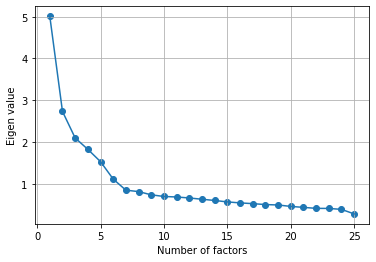

In [12]:

plt.scatter(range(1,req_data.shape[1]+1),ev)
plt.plot(range(1,req_data.shape[1]+1),ev)
plt.xlabel('Number of factors')
plt.ylabel('Eigen value')
plt.grid()

- ___Eigen values are grater than 1 for 6 factors.In other words, 6 factors exaplin more variance than a single variable's variance.___


# Step 3: Factor Analysis 

### 3.1 Perform factor analysis with 6 factors

In [13]:
factor_check = fa(rotation = 'varimax',n_factors=6)
factor_check.fit(req_data)
loadings = factor_check.loadings_

print(pd.DataFrame(loadings, index = req_data.columns))


           0         1         2         3         4         5
A1  0.097528  0.037128  0.053857 -0.522915  0.140166  0.163919
A2  0.032937  0.227528  0.139019  0.645446 -0.062075  0.011481
A3 -0.014661  0.343562  0.118134  0.593918 -0.015815  0.150025
A4 -0.078329  0.195525  0.234253  0.391401  0.130919  0.075741
A5 -0.144837  0.414092  0.109054  0.463465  0.005674  0.235017
C1 -0.010766  0.070517  0.542204 -0.009397 -0.158301  0.110617
C2  0.062844  0.035616  0.674352  0.061709 -0.055994  0.158368
C3 -0.031286  0.029948  0.541124  0.109318  0.013146  0.003876
C4  0.218693 -0.064916 -0.607214 -0.110255  0.183942  0.307498
C5  0.284743 -0.174470 -0.533250 -0.073719 -0.003989  0.155319
E1  0.018201 -0.586529  0.059661 -0.124729  0.087458  0.134905
E2  0.230061 -0.684311 -0.075180 -0.110832  0.048335  0.127395
E3 -0.008977  0.560690  0.101674  0.182757 -0.187299  0.287336
E4 -0.126936  0.653418  0.111993  0.229526  0.143983  0.141163
E5  0.033403  0.504681  0.311978  0.082179 -0.186787  0

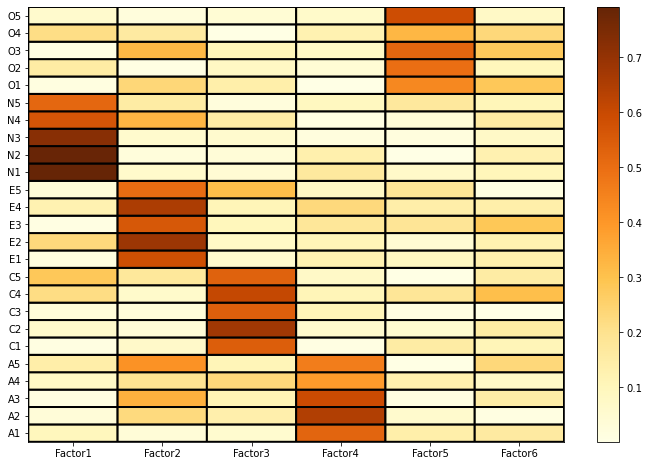

In [14]:
Z=np.abs(loadings)
fig, ax = plt.subplots(figsize=(12,8))

c = ax.pcolor(np.abs(loadings),edgecolors='k', linewidths=2, cmap='YlOrBr')
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(req_data.columns)
ax.set_xticklabels(['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6'])
plt.show()

<div class="alert alert-block alert-warning">
    
* <span style='font-family:Calibri; color:black'> It is seen that only 5 factors have significant factor laoding among groups of variables. Factor 6 does not have significant loadings for any variable. So it is better to rerun the factor analysis with 5 factors.
    
</div>

### 3.2 Perform factor analysis with 5 factors

           0         1         2         3         4
A1  0.121465  0.035922  0.023508 -0.405797 -0.081744
A2  0.029466  0.203618  0.143488  0.612687  0.067926
A3  0.005916  0.315479  0.106541  0.637050  0.059312
A4 -0.058769  0.180260  0.229554  0.424766 -0.105325
A5 -0.111108  0.389487  0.089269  0.535723  0.062058
C1  0.005466  0.061325  0.531239  0.024361  0.192390
C2  0.088496  0.028118  0.646730  0.109703  0.105456
C3 -0.021174  0.021387  0.547365  0.118951 -0.004409
C4  0.252160 -0.062913 -0.605096 -0.039373 -0.112244
C5  0.295110 -0.170271 -0.552598 -0.056494  0.032626
E1  0.041701 -0.573332  0.040001 -0.099896 -0.068864
E2  0.245617 -0.678191 -0.091408 -0.104314 -0.036540
E3  0.021072  0.535364  0.079164  0.266186  0.266876
E4 -0.099015  0.641977  0.099881  0.299816 -0.083848
E5  0.032069  0.498240  0.315720  0.091252  0.207764
N1  0.766903  0.075279 -0.039176 -0.216011 -0.084817
N2  0.746157  0.032854 -0.029640 -0.193203 -0.018998
N3  0.731799 -0.057207 -0.066316 -0.031274  0.

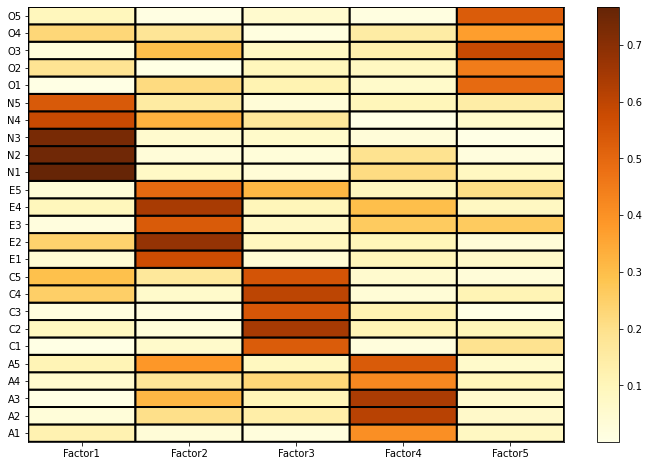

In [15]:
factor_check = fa(rotation = 'varimax',n_factors=5)
factor_check.fit(req_data)
loadings = factor_check.loadings_

print(pd.DataFrame(loadings, index = req_data.columns))

fig, ax = plt.subplots(figsize=(12,8))

c = ax.pcolor(np.abs(loadings),edgecolors='k', linewidths=2, cmap='YlOrBr')
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(req_data.columns)
ax.set_xticklabels(['Factor1','Factor2','Factor3','Factor4','Factor5'])
plt.show()

<div class="alert alert-block alert-success">
    
* <span style='font-family:Calibri; color:black'> We can see that each group of related variables [A1 to A5, C1 to C5, etc] loads to one factor each. Thus it is confirmed that,
    
* <span style='font-family:Calibri; color:black'> A1 to A5 load as a single factor  (representing Agreeableness)

* <span style='font-family:Calibri; color:black'> C1 to C5 load as a single factor  (representing Conscientiousness)

* <span style='font-family:Calibri; color:black'> E1 to E5 load as a single factor  (representing Extraversion)

* <span style='font-family:Calibri; color:black'> N1 to N5 load as a single factor  (representing Neuroticism)

* <span style='font-family:Calibri; color:black'> O1 to O5 load as a single factor  (representing Openness)    
  
</div>